## Linear Support Vector Machine(SVM)

분류는 2개의 카테고리 데이터를 분류하는 선형 **Decision Boundary**를 찾는 것이 목적이다.

In [ ]:
# matplotlib과 관련된 모듈을 미리 선언
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

import numpy as np

### LinearSVM  기본

In [ ]:
# 랜덤한 데이터 생성
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1,
                          n_classes = 2, n_clusters_per_class = 1, random_state = 30)


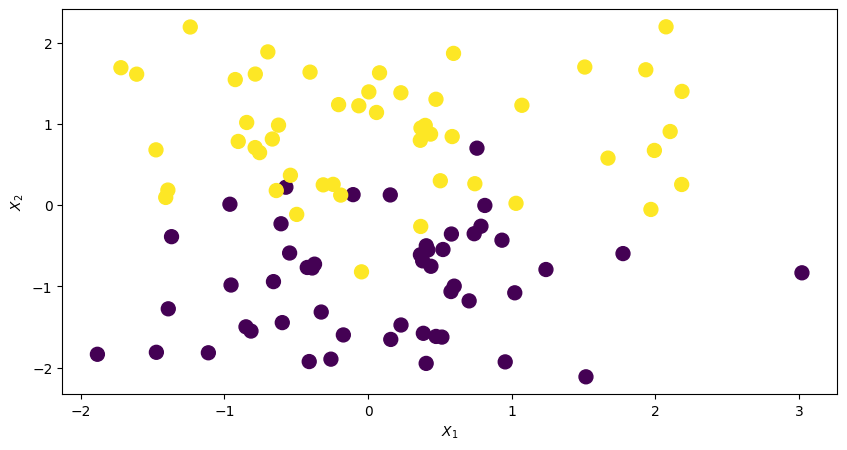

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0], X[:,1], c=y, marker = 'o', s=100)
plt.xlabel('$X_1$')
plt.ylabel("$X_2$")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [ ]:
# 사이킷런의 SVM패키지 안에 서포트 벡터 머신의 모형 SVC(Support Vector Classifier)를 제공한다.

# step 1. 임포트 모델
from sklearn.svm import SVC

# 모델 선언 및 모델.fit(학습데이터)
linear_svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)



In [ ]:
# 사이킷런의 SVM패키지 안에 서포트 벡터 머신의 모형 SVC(Support Vector Classifier)를 제공한다.
from sklearn.svm import SVC # step 1. 임포트 모델

svc = SVC(kernel = 'linear', C = 1) # 모델 선언 및 모델.fit(학습데이터)
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))
svc.predict(X_test)

0.95


array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

SVC의 매개변수
- kernel: 커널설정, 기본값은 'rbf' -> 우리는 linear로 하겠습니다.

- C : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0
    C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다.    
    즉, **모델의 오차 허용률**을 조절한다.  
    C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.
    C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
    즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다.

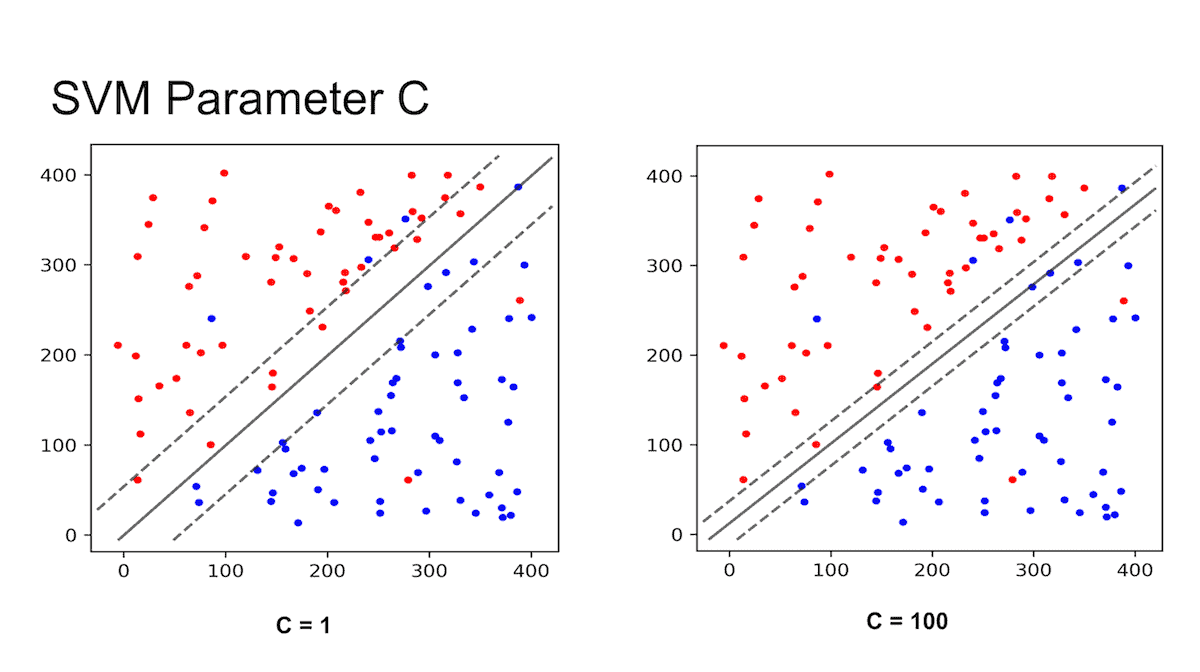

In [ ]:
# 각 클래스의 서포트 벡터(Support vector)의 개수
linear_svc.n_support_

array([13, 13], dtype=int32)

In [ ]:
# 각 클래스의 서포트 x값(X+, X-)
linear_svc.support_vectors_

array([[ 7.85927562e-01, -2.57959730e-01],
       [-5.72031155e-01,  2.23315502e-01],
       [ 8.13037304e-01, -1.77125524e-03],
       [ 4.05290603e-01, -4.99403821e-01],
       [ 5.80123785e-01, -3.54179592e-01],
       [ 7.38732944e-01, -3.50239628e-01],
       [ 4.16579976e-01, -5.51478928e-01],
       [-9.61741304e-01,  1.31964138e-02],
       [ 9.32147964e-01, -4.30160921e-01],
       [ 1.54638551e-01,  1.27789479e-01],
       [-5.46078987e-01, -5.88253833e-01],
       [-1.36815913e+00, -3.86680912e-01],
       [ 7.58193569e-01,  7.04371769e-01],
       [-2.43243873e-01,  2.58245976e-01],
       [-1.39366737e+00,  1.87784548e-01],
       [-4.56006658e-02, -8.20382239e-01],
       [ 5.03043054e-01,  3.02706521e-01],
       [-3.12002333e-01,  2.52113837e-01],
       [-1.90365849e-01,  1.26048240e-01],
       [ 3.66685623e-01, -2.60707536e-01],
       [ 1.02999534e+00,  2.43675938e-02],
       [ 1.96902533e+00, -5.09911121e-02],
       [-1.40853733e+00,  9.72217075e-02],
       [ 2.

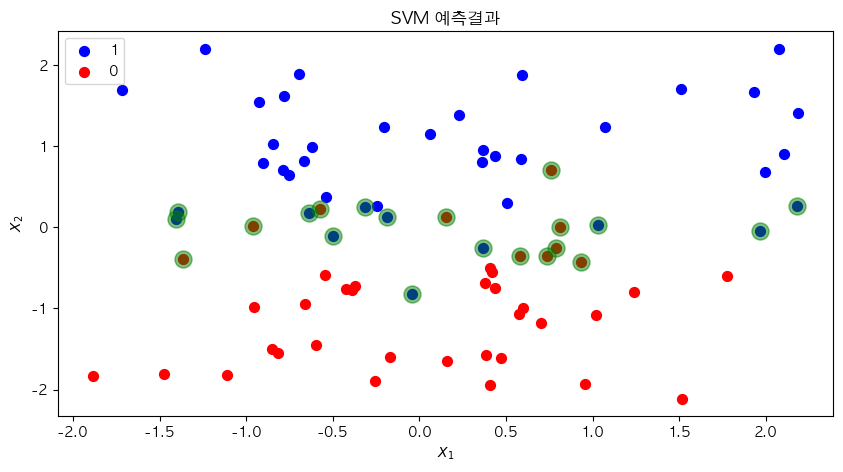

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X_train[y_train==1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s = 50)
plt.scatter(X_train[y_train==0, 0], X_train[y_train ==0, 1],  c= 'r', label = '0', s = 50)
plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1],
            s = 150, c = 'g', alpha = 0.5) #알파는 투명도

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측결과")

plt.show()

In [ ]:
print('train_score: {}'.format(linear_svc.score(X_train, y_train)))
print('test_score: {}'.format(linear_svc.score(X_test, y_test)))

train_score: 0.9
test_score: 0.95


C :  0.01
train_score: 0.9
test_score: 0.95


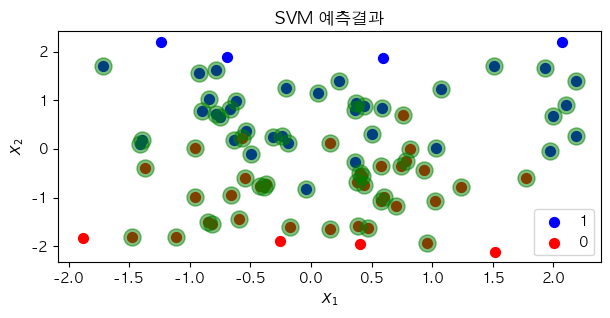

C :  0.1
train_score: 0.8875
test_score: 0.95


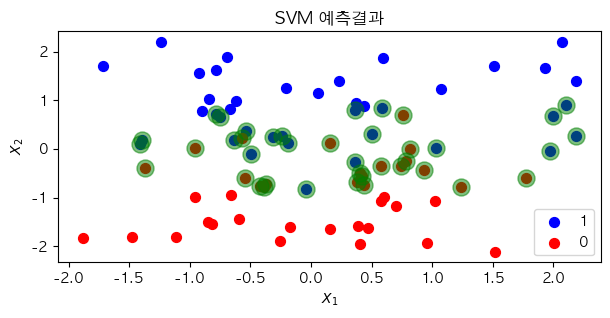

C :  1
train_score: 0.9
test_score: 0.95


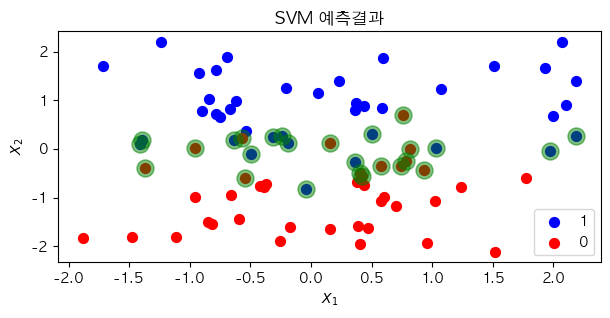

C :  10
train_score: 0.9
test_score: 0.95


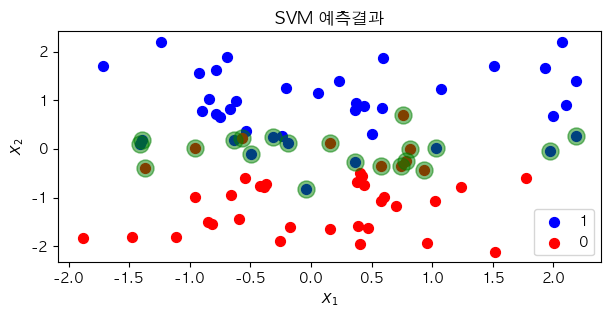

In [ ]:
#값이 너무 극단적이기 때문에 C값을 조금 줄여서(규제를 줘서) 할 필요가 있음

C_list = [0.01, 0.1, 1, 10]

for c in C_list :
    print("C : ", c)

    linear_svc = SVC(kernel = 'linear', C = c).fit(X_train, y_train)

    print('train_score: {}'.format(linear_svc.score(X_train, y_train)))
    print('test_score: {}'.format(linear_svc.score(X_test, y_test)))
    plt.figure(figsize = (7,3))
    plt.scatter(X_train[y_train==1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s = 50)
    plt.scatter(X_train[y_train==0, 0], X_train[y_train ==0, 1],  c= 'r', label = '0', s = 50)
    plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1],
                s = 150, c = 'g', alpha = 0.5) #알파는 투명도


    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.legend()
    plt.title("SVM 예측결과")

    plt.show()

### 실제 데이터에 적용하기

In [ ]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

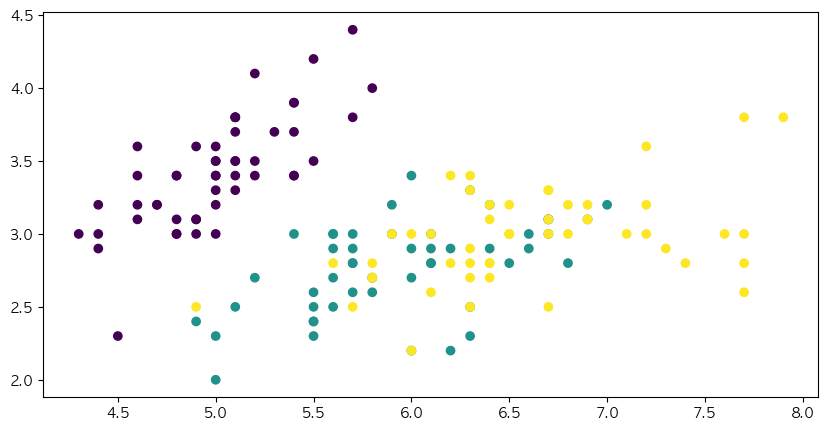

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = iris_data.target,
                                                     shuffle = True)

In [ ]:
# 스케일링 하기
from sklearn.preprocessing import StandardScaler


In [ ]:
# 선형 SVC 모델 객체 불러오고 학습시키기

from sklearn.svm import LinearSVC


LinearSVC()

In [ ]:
# train score

0.9642857142857143

In [ ]:
# test score

0.9736842105263158

#### 시각화
Decision Boundary 시각화를 위해 2가지 변수만 사용해보겠습니다.

In [ ]:
# !pip install mglearn
# !pip install --upgrade joblib==1.1.0

In [ ]:
# 시각화를 위해 2개의 특성만 사용(sepal width, pedal length)
from sklearn.svm import SVC

data_x = iris_data.data[:, [1,3]]
data_y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2,
                                                    shuffle = True)
linear_svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
print("train score: {:.3f}".format(linear_svm.score(X_train, y_train)))
print('test score: {:.3f}'.format(linear_svm.score(X_test, y_test)))

train score: 0.958
test score: 1.000


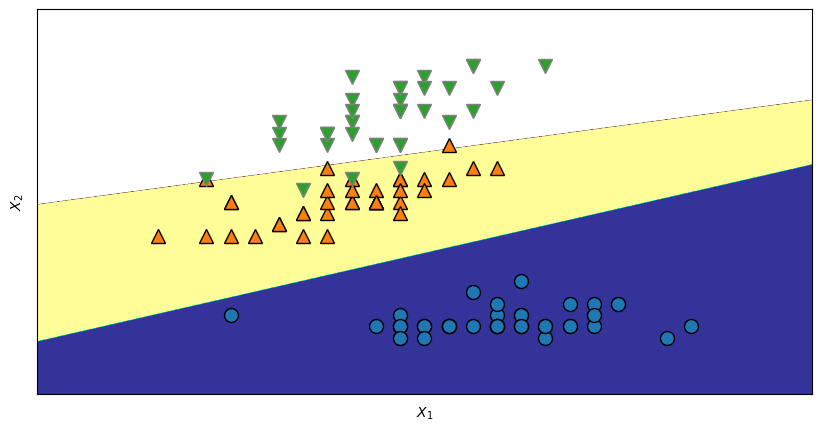

In [ ]:
#시각화를 위해 mglearn 모듈 사용
import mglearn

plt.figure(figsize=(10,5))
mglearn.plots.plot_2d_classification(linear_svm, X_train, eps = 0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

#2차원으로만 그림을 그린거라서 그림의 정확도가 그렇게 좋진 않음.
#실제 모델은 정확도가 더 좋음.
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

#### C값 변경

SVC  

* 주요 parameter:
 - `kernel` : 커널 타입['rbf', 'linear', 'poly', 'sigmoid', 'precomputed'], 기본값은 'rbf'  
        커널(kernel)은 선형으로 분리할 수 없는 점들을 분류하기 위해 사용한다.  
        커널을 통해 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환할 수 있다.  
        
        RBF(Radial Bias Function):
        rbf커널 혹은 가우시안 커널이라고 불리며 무한차원까지 모든 다항식을 고려한다. 여러 커널 중 가장 성능이 좋아 자주 사용된다.  
<a title="Shehzadex, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"><img width="512" alt="Kernel yontemi ile veriyi daha fazla dimensiyonlu uzaya tasima islemi" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png/512px-Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"></a>  
커널을 통해 데이터를 더 높은 차원으로 변형함으로 나타냄으로써 결정 경계를 얻을 수 있다.  
[출처] <a href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png">Shehzadex</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

 - `C` : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0  
        C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다. 즉, 모델의 오차 허용률을 조절한다.  
        C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.  
        C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
        즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다.  
 - `gamma` : 학습 데이터에 얼마나 민감하게 반응할 것인지 결정, 기본값은 'scale'(= 1/(n_features*X.var()))
        즉, 결정경계의 굴곡의 정도를 결정한다.
        gamma값이 클수록 경계선에서 가까운 점들만이 계산에서 고려되어 결정경계의 굴곡이 높아진다.
        gamma값이 작을수록 경계선에서 멀리 떨어진 점들까지도 계산에서 고려되어 결정경계의 굴곡이 낮아진다.
        따라서, 높은 gamma값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 gamma값은 모델을 더 유연하게 만들어준다.  
        
    ![c_gamma](https://tensorflowkorea.files.wordpress.com/2017/06/2-42.png?w=768)  
    C값이 클수록, gamma값이 클수록 결정경계를 더욱 안정적으로 만드는 것을 알 수 있다.  
    [출처] [tensorflow.blog](https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-7-%ec%bb%a4%eb%84%90-%ec%84%9c%ed%8f%ac%ed%8a%b8-%eb%b2%a1%ed%84%b0-%eb%a8%b8%ec%8b%a0/#svm-understand)  




참고 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

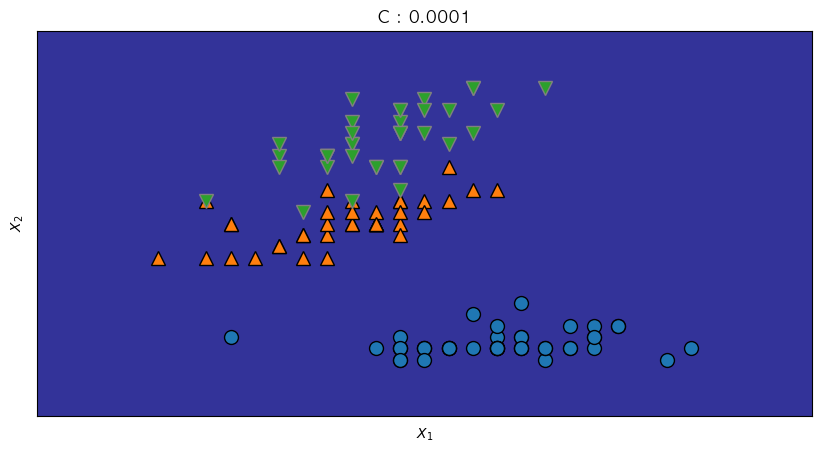

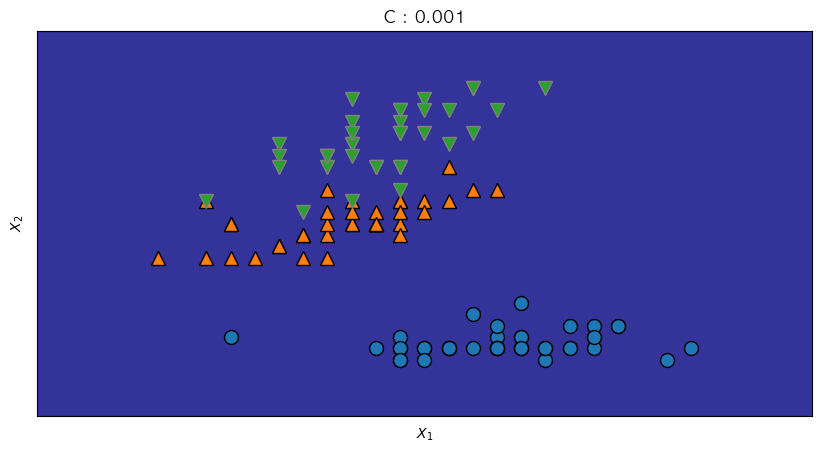

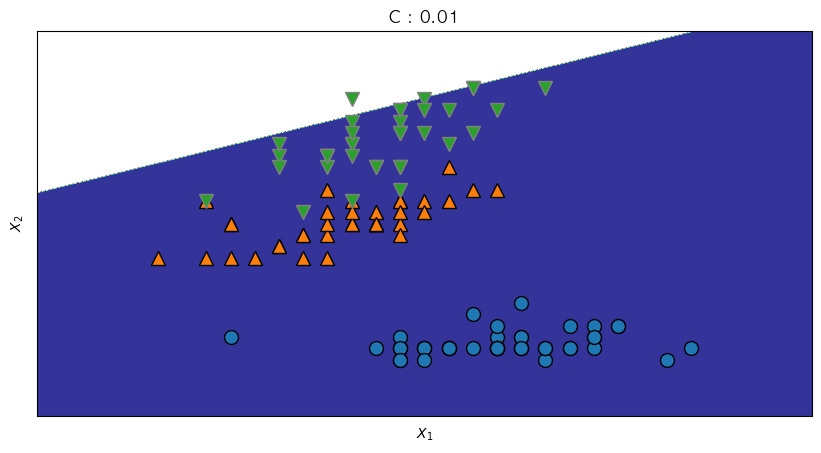

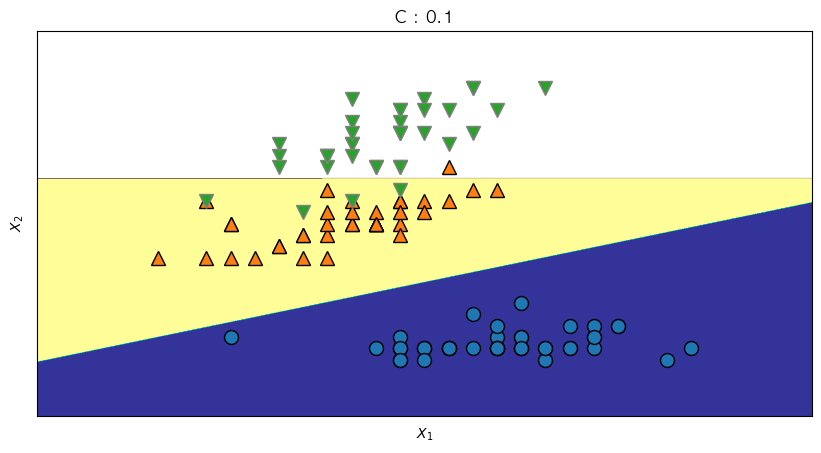

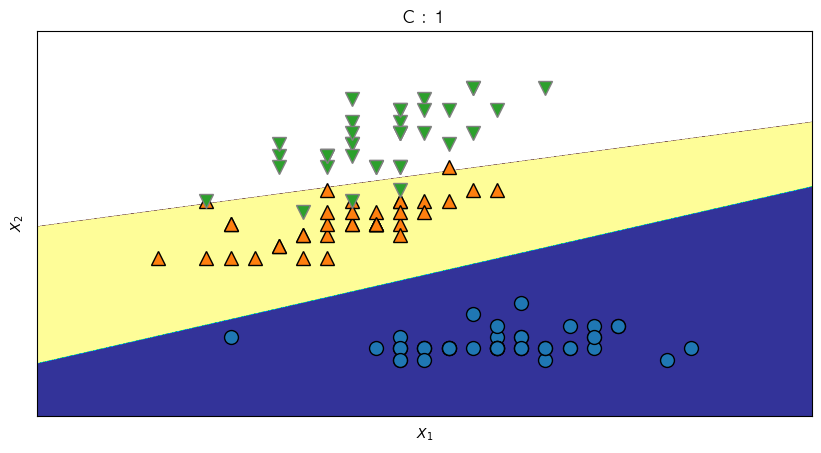

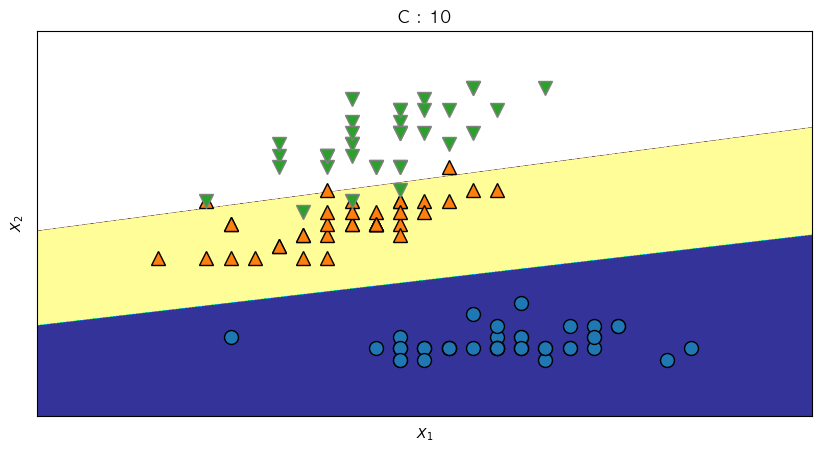

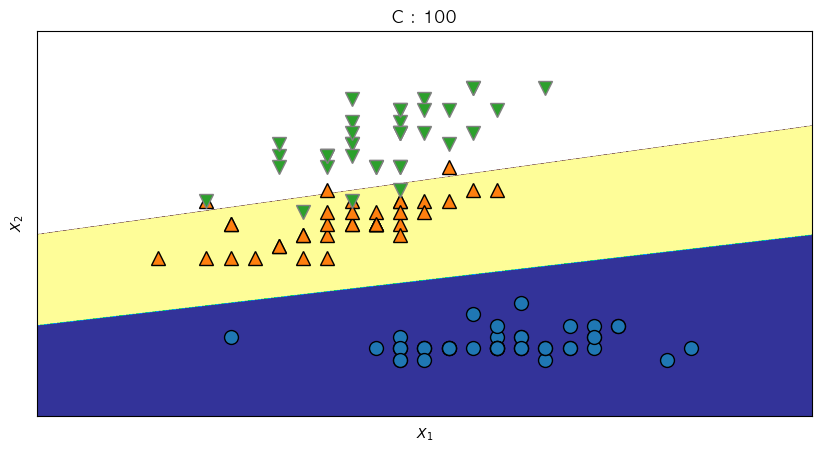

In [ ]:
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# C값이 커질 수록 마진이 작아진다.
# C값을 변경해 가면서 각 모델들의 score를 확인하고자 한다.
# 한 번에 확인하기 위해서 C값을 리스트로 저장하고 for문을 이용하여 score를 구했다.

train_score = []
test_score = []

for C in C_list:
    linear_svm = SVC(kernel ='linear', C = C).fit(X_train, y_train)
    score_tr = linear_svm.score(X_train, y_train)
    score_te = linear_svm.score(X_test, y_test)
    train_score.append(score_tr)
    test_score.append(score_te)

    plt.figure(figsize=(10,5))
    mglearn.plots.plot_2d_classification(linear_svm, X_train, eps = 0.5, cm = 'terrain')
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

    plt.title(f"C : {C}")
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.show()

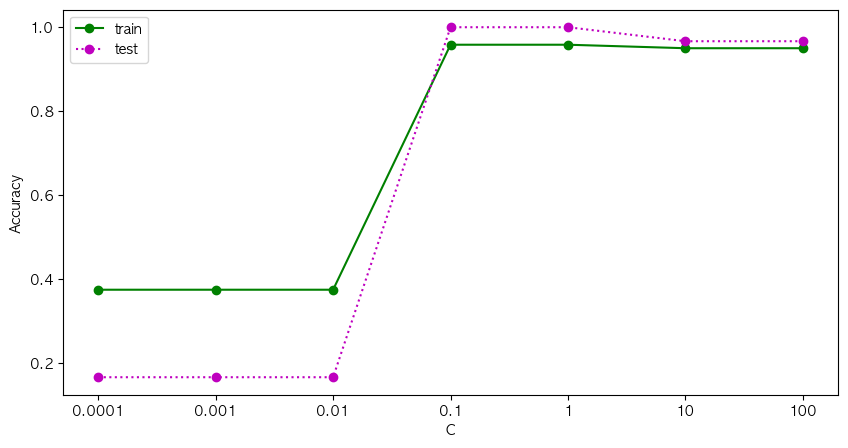

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C_list)),C_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()
#hyper parameter tuning 방법에 따라 최적을 찾아주면 됨.

### 직접 학습시켜봅시다.


In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
# EDA

In [ ]:
# 전처리

In [ ]:
# 모델링

In [ ]:
# 성능평가